In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


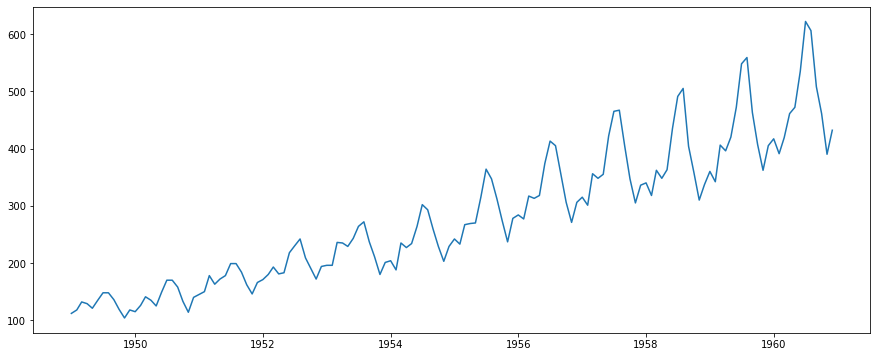

In [4]:
plt.plot(data)

In [5]:
y = data['#Passengers']

In [6]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Resutaldo do Teste Dickey-Fuller:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor p', '# de lags', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valores Críticos ({})'.format(key)] = value
    print(dfoutput)

In [7]:
adf_test(y)

Resutaldo do Teste Dickey-Fuller:
Teste                       0.815369
Valor p                     0.991880
# de lags                  13.000000
# de observações          130.000000
Valores Críticos (1%)      -3.481682
Valores Críticos (5%)      -2.884042
Valores Críticos (10%)     -2.578770
dtype: float64


In [8]:
y_diff = np.diff(y)

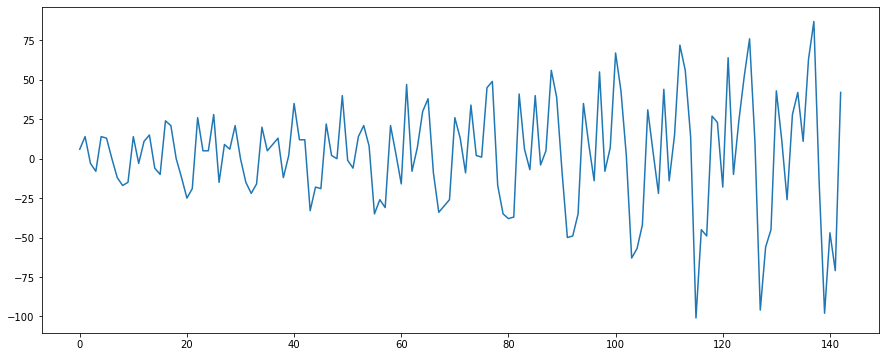

In [9]:
plt.plot(y_diff)

In [10]:
adf_test(y_diff)

Resutaldo do Teste Dickey-Fuller:
Teste                      -2.829267
Valor p                     0.054213
# de lags                  12.000000
# de observações          130.000000
Valores Críticos (1%)      -3.481682
Valores Críticos (5%)      -2.884042
Valores Críticos (10%)     -2.578770
dtype: float64


In [11]:
y_diff2 = np.diff(y_diff)

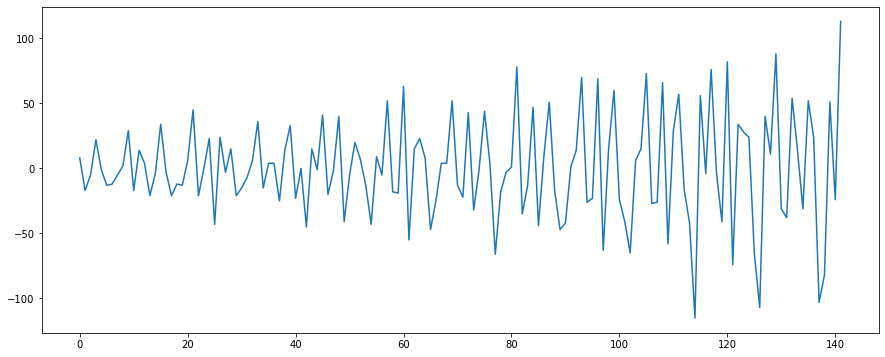

In [12]:
plt.plot(y_diff2)

In [13]:
adf_test(y_diff2)

Resutaldo do Teste Dickey-Fuller:
Teste                    -1.638423e+01
Valor p                   2.732892e-29
# de lags                 1.100000e+01
# de observações          1.300000e+02
Valores Críticos (1%)    -3.481682e+00
Valores Críticos (5%)    -2.884042e+00
Valores Críticos (10%)   -2.578770e+00
dtype: float64
